In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/Training.csv
/kaggle/input/diabetes-dataset/Testing.csv


In [2]:
df = pd.read_csv('/kaggle/input/diabetes-dataset/Training.csv')

In [3]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(2460, 9)

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
import seaborn as sns

<Axes: >

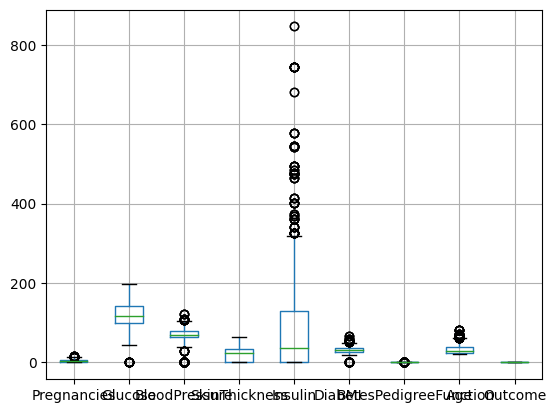

In [8]:
df.boxplot()

outliers can be seen


In [9]:
new_df = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]

In [10]:
target = df['Outcome']

In [11]:
from sklearn.preprocessing import normalize

In [12]:
nor_arr = normalize(new_df)

In [13]:
print(nor_arr)

[[3.35523701e-02 8.27625129e-01 4.02628441e-01 ... 1.87893272e-01
  3.50622267e-03 2.79603084e-01]
 [8.42400400e-03 7.16040340e-01 5.55984264e-01 ... 2.24078506e-01
  2.95682540e-03 2.61144124e-01]
 [4.03976822e-02 9.24096981e-01 3.23181458e-01 ... 1.17658249e-01
  3.39340531e-03 1.61590729e-01]
 ...
 [7.67365077e-03 6.13892062e-01 5.67850157e-01 ... 2.30209523e-01
  4.04401396e-03 1.68820317e-01]
 [6.57179415e-03 6.30892238e-01 4.20594826e-01 ... 2.18183566e-01
  1.89924851e-03 1.38007677e-01]
 [3.87891495e-02 6.78810117e-01 4.52540078e-01 ... 1.99117634e-01
  7.88712707e-04 2.39199755e-01]]


In [14]:
nor_df = pd.DataFrame(nor_arr)

In [15]:
nor_df.head()

,0,1,2,3,4,5,6,7
0,0.033552,0.827625,0.402628,0.195722,0.000000,0.187893,0.003506,0.279603
1,0.008424,0.716040,0.555984,0.244296,0.000000,0.224079,0.002957,0.261144
2,0.040398,0.924097,0.323181,0.000000,0.000000,0.117658,0.003393,0.161591
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852
4,0.000000,0.596386,0.174127,0.152361,0.731335,0.187622,0.009960,0.143655


renaming the columns namess


In [16]:
nor_df = nor_df.rename(columns = {0: "Pregnancies",1: "Glucose",2: "BloodPressure", 3: "SkinThickness",4: "Insulin",5: "BMI",6: "DiabetesPedigreeFunction",7: "Age"})

In [17]:
nor_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.033552,0.827625,0.402628,0.195722,0.000000,0.187893,0.003506,0.279603
1,0.008424,0.716040,0.555984,0.244296,0.000000,0.224079,0.002957,0.261144
2,0.040398,0.924097,0.323181,0.000000,0.000000,0.117658,0.003393,0.161591
3,0.006612,0.588467,0.436392,0.152076,0.621527,0.185797,0.001104,0.138852
4,0.000000,0.596386,0.174127,0.152361,0.731335,0.187622,0.009960,0.143655


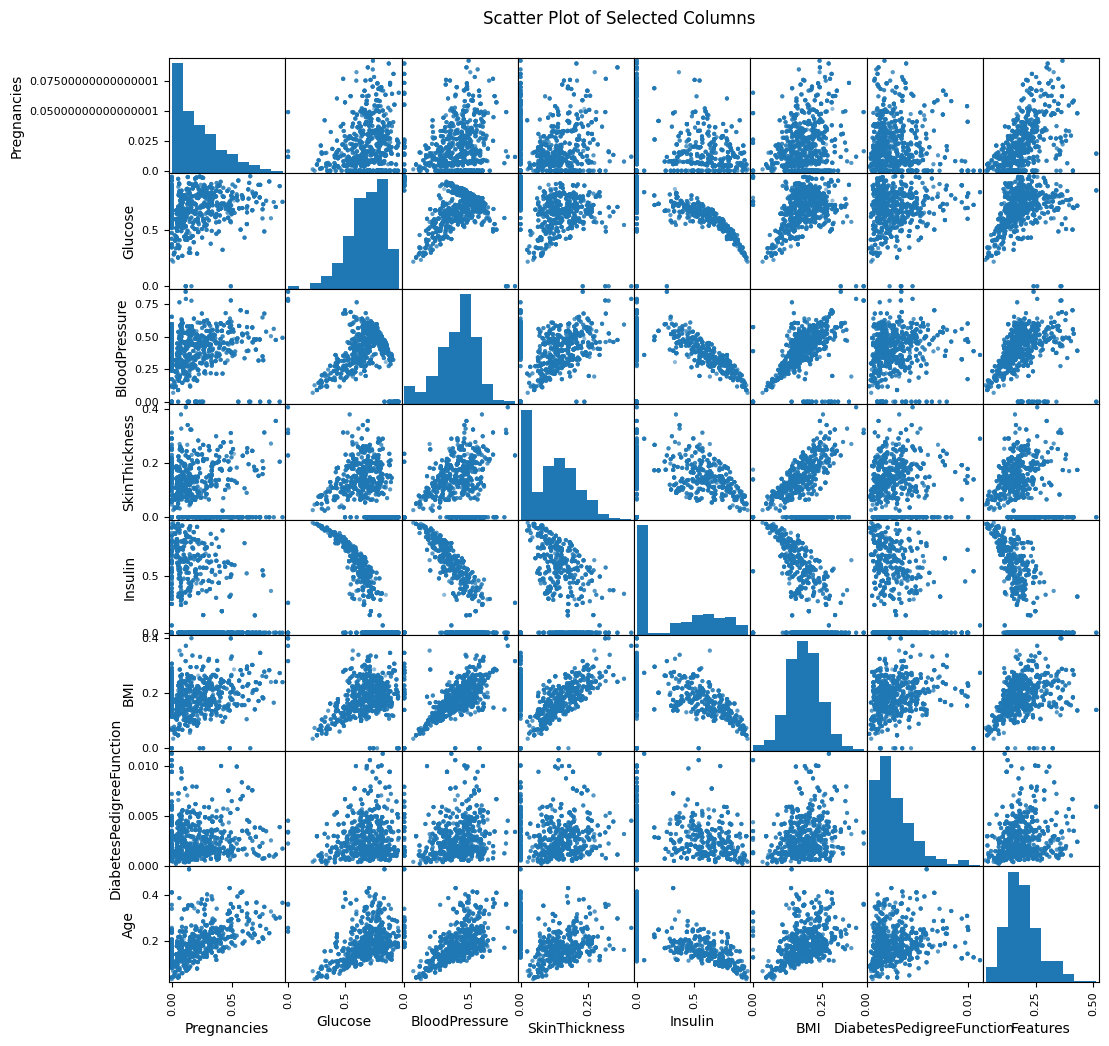

In [18]:
import matplotlib.pyplot as plt  # Importing Matplotlib

# Drop any duplicate columns from nor_df
nor_df_unique_columns = nor_df.loc[:,~nor_df.columns.duplicated()]

# Extracting the specified columns from nor_df
selected_columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
data = nor_df_unique_columns[selected_columns]

# Create a scatter plot for each pair of columns
pd.plotting.scatter_matrix(data, figsize=(12, 12))

# Add labels and title
plt.xlabel('Features')  # Adding x-axis label
plt.ylabel('Features')  # Adding y-axis label
plt.suptitle('Scatter Plot of Selected Columns', y=0.92)  # Adding title

# Show the plot
plt.show()


this show that the plooting is non linear hence we use non linear SVM
from google


In [19]:
test = pd.read_csv('/kaggle/input/diabetes-dataset/Testing.csv')

In [20]:
# nor_df = contains first 8 cols 
# target = target column
# test = test dtaset 

In [21]:
test.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9,120,72,22,56,20.8,0.733,48,0
1,1,71,62,0,0,21.8,0.416,26,0
2,8,74,70,40,49,35.3,0.705,39,0
3,5,88,78,30,0,27.6,0.258,37,0
4,10,115,98,0,0,24.0,1.022,34,0
5,0,124,56,13,105,21.8,0.452,21,0
6,0,74,52,10,36,27.8,0.269,22,0
7,0,97,64,36,100,36.8,0.600,25,0
8,8,120,0,0,0,30.0,0.183,38,1
9,6,154,78,41,140,46.1,0.571,27,0


In [22]:
X_train = nor_df
Y_train = target

easy splitting of data as testing and training datasets are both given


In [23]:
X_test = test[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
Y_test = test['Outcome']

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [25]:
svm_model = SVC(kernel='linear')

In [26]:
svm_model.fit(X_train, Y_train)

SVC(kernel='linear')

In [27]:
y_pred = svm_model.predict(X_test)

In [28]:
accuracy = accuracy_score(Y_test, y_pred)

In [29]:
print("Accuracy:", accuracy)

Accuracy: 0.698051948051948
